In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/shubhamsk0001/EDA/main/cleaned_census_data.csv")

In [17]:
df.head()

,Age,workclass,final_weight,education,education_name,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,Income_per_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.shape

(30162, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   final_weight     30162 non-null  int64 
 3   education        30162 non-null  object
 4   education_name   30162 non-null  int64 
 5   marital_status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   sex              30162 non-null  object
 10  capital_gain     30162 non-null  int64 
 11  capital_loss     30162 non-null  int64 
 12  hours_week       30162 non-null  int64 
 13  native_country   30162 non-null  object
 14  Income_per_year  30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
final_weight,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education_name,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital_gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital_loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hours_week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


In [22]:
df.columns

Index(['Age', 'workclass', 'final_weight', 'education', 'education_name',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_week', 'native_country',
       'Income_per_year'],
      dtype='object')

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']

In [25]:
numeric_features

['Age',
 'final_weight',
 'education_name',
 'capital_gain',
 'capital_loss',
 'hours_week']

In [26]:
df[numeric_features]

,Age,final_weight,education_name,capital_gain,capital_loss,hours_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
30157,27,257302,12,0,0,38
30158,40,154374,9,0,0,40
30159,58,151910,9,0,0,40
30160,22,201490,9,0,0,20


In [27]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

In [28]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'Income_per_year']

In [29]:
df[categorical_features]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,Income_per_year
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30157,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30158,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30159,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30160,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [30]:
for col in categorical_features:
    print(col)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
Income_per_year


In [31]:
for col in categorical_features:
    print(f"{col}:{df[col].value_counts(normalize=True)*100}")
    print("=============================================")

workclass: Private             73.887673
 Self-emp-not-inc     8.285260
 Local-gov            6.852994
 State-gov            4.240435
 Self-emp-inc         3.560772
 Federal-gov          3.126451
 Without-pay          0.046416
Name: workclass, dtype: float64
education: HS-grad         32.623831
 Some-college    22.140442
 Bachelors       16.723029
 Masters          5.394205
 Assoc-voc        4.333267
 11th             3.474571
 Assoc-acdm       3.341953
 10th             2.718653
 7th-8th          1.846695
 Prof-school      1.796963
 9th              1.508521
 12th             1.249917
 Doctorate        1.243286
 5th-6th          0.954844
 1st-4th          0.500630
 Preschool        0.149194
Name: education, dtype: float64
marital_status: Married-civ-spouse       46.631523
 Never-married            32.245872
 Divorced                 13.971222
 Separated                 3.113189
 Widowed                   2.741861
 Married-spouse-absent     1.226709
 Married-AF-spouse         0.069624


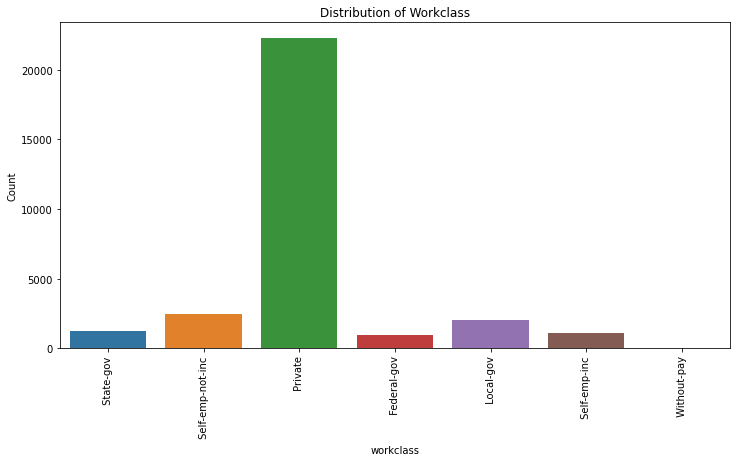

In [38]:
# Distribution of workclass
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', data=df)
plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.xticks(rotation=90)
plt.show()

# From the Distribution of workclass, We can see the highest no of people are employed in the Private.

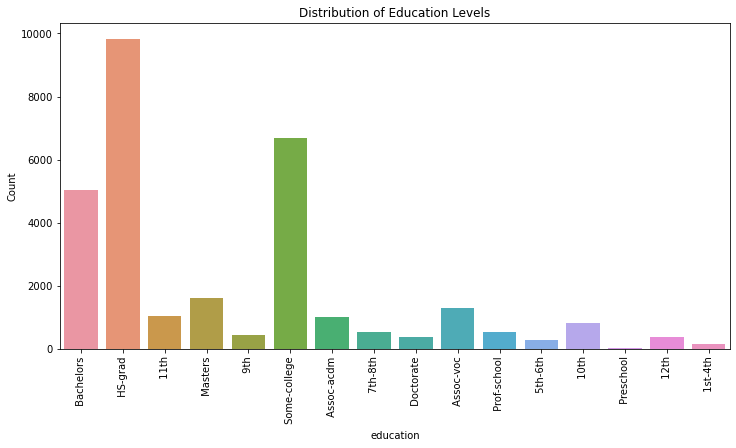

In [39]:
# Distribution of education Levels
plt.figure(figsize=(12,6))
sns.countplot(x='education', data=df)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=90)
plt.show()

# From the Distribution of Education Level, We can see the highest no of people have completed HS-grad.

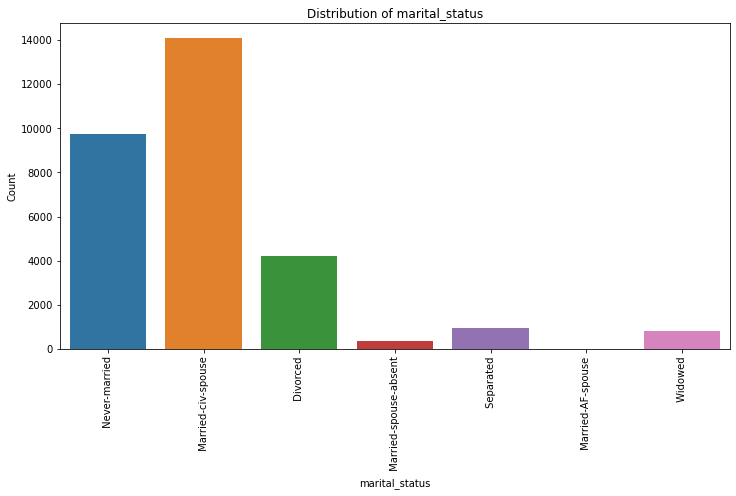

In [40]:
# Distribution of martial satatus
plt.figure(figsize=(12,6))
sns.countplot(x='marital_status', data=df)
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.title('Distribution of marital_status')
plt.xticks(rotation=90)
plt.show()

# From the Distribution of martial_status, We can see the highest no of people married are Married-civ-spouse.

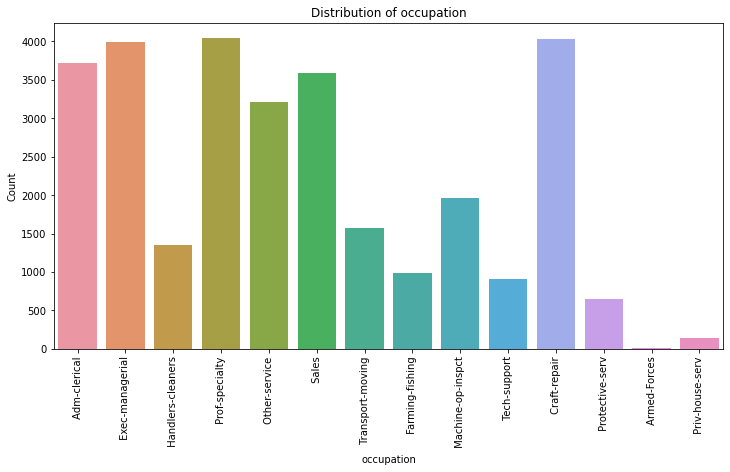

In [41]:
# Distribution of occupation
plt.figure(figsize=(12,6))
sns.countplot(x='occupation', data=df)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Distribution of occupation')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='occupation'>

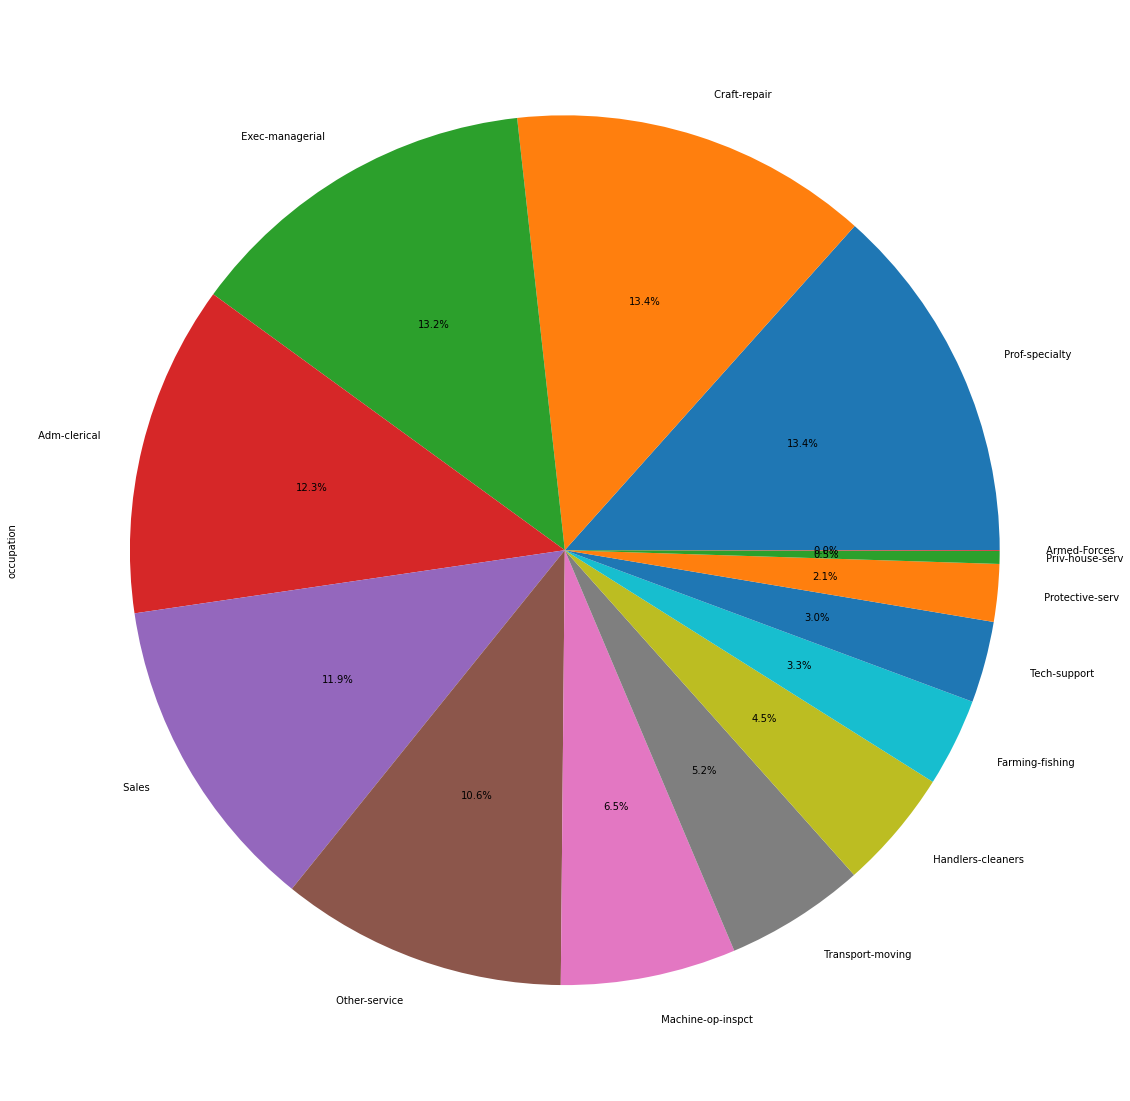

In [53]:
df["occupation"].value_counts().plot.pie(y=df["occupation"],figsize=(20,20),autopct='%1.1f%%')

# From the Distribution of occupation,It is hard to find out highest no of people from particular occupation from bar graph.Therefore we plot a pie chart to get the highest no of people from the particular occupation.

# Therefore from pie chart we get the highest no of people are from a particular occupation are from Prof-speciality and Craft-repair.

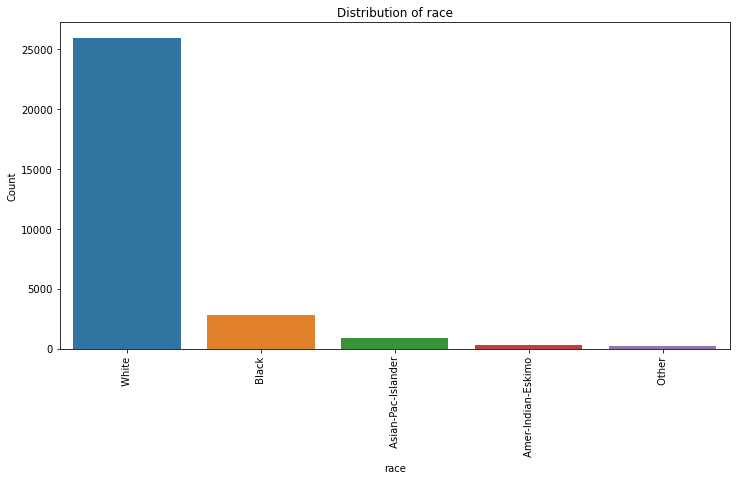

In [42]:
# Distribution of race
plt.figure(figsize=(12,6))
sns.countplot(x='race', data=df)
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Distribution of race')
plt.xticks(rotation=90)
plt.show()

# From the Distribution of race, We can see the highest no of people belongs to White.

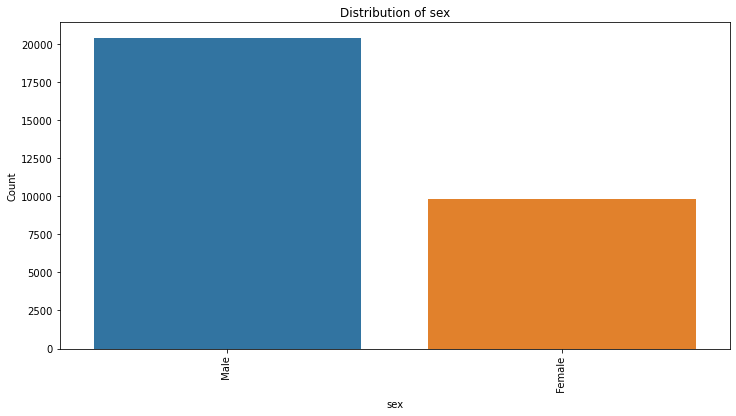

In [43]:
# Distribution of sex
plt.figure(figsize=(12,6))
sns.countplot(x='sex', data=df)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Distribution of sex')
plt.xticks(rotation=90)
plt.show()

# From the Distribution of sex, We can see the highest no of people are Male.

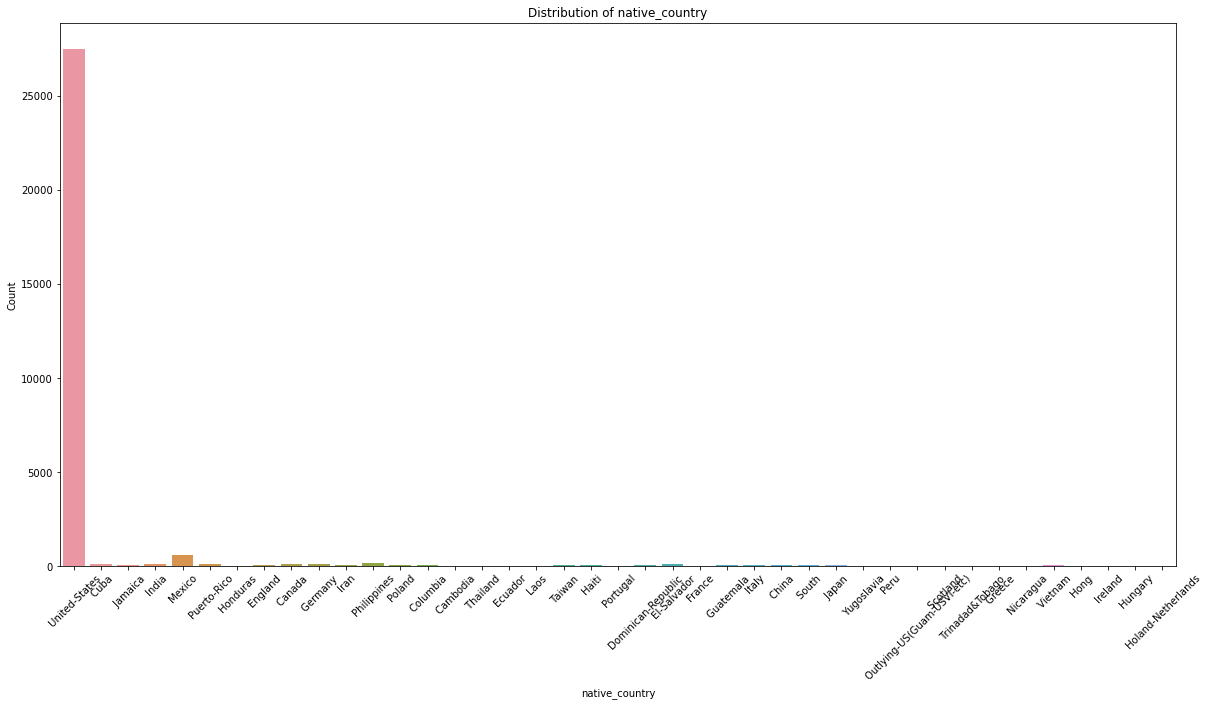

In [55]:
# Distribution of native_country
plt.figure(figsize=(20,10))
sns.countplot(x='native_country', data=df)
plt.xlabel('native_country')
plt.ylabel('Count')
plt.title('Distribution of native_country')
plt.xticks(rotation=45)
plt.show()

# From the Distribution of native_country, We can see the highest no of people belongs to United States.

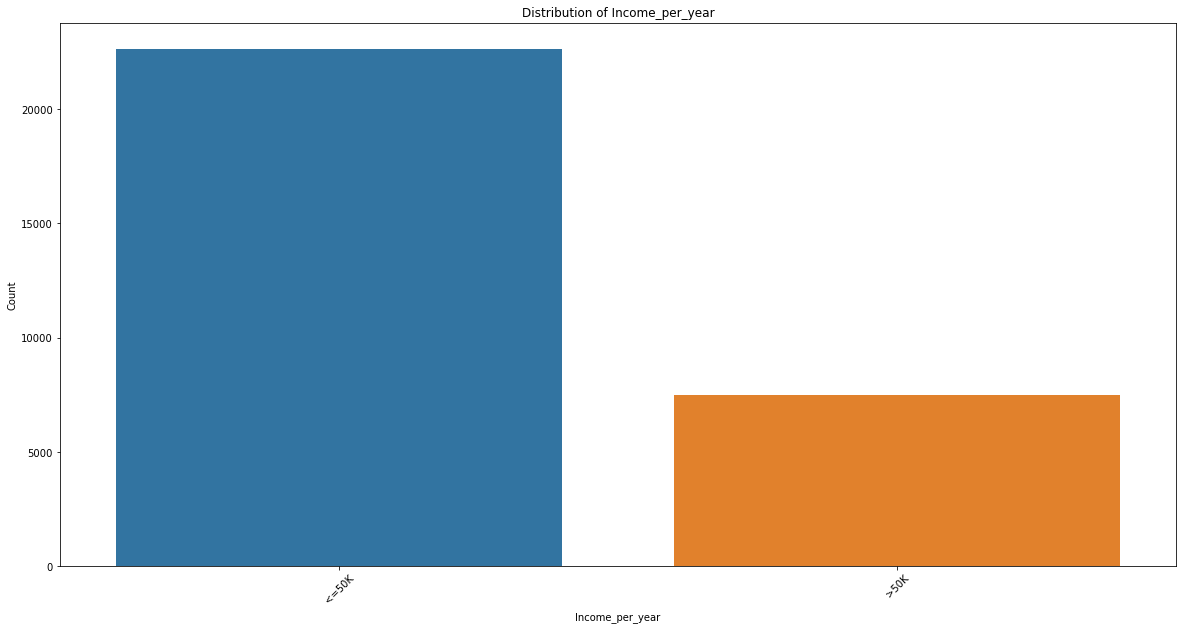

In [56]:
# Distribution of Income_per_year
plt.figure(figsize=(20,10))
sns.countplot(x='Income_per_year', data=df)
plt.xlabel('Income_per_year')
plt.ylabel('Count')
plt.title('Distribution of Income_per_year')
plt.xticks(rotation=45)
plt.show()

# From the Distribution of Income_per_year, We can see the highest no of people belongs to income <=50K.

In [57]:
numeric_features

['Age',
 'final_weight',
 'education_name',
 'capital_gain',
 'capital_loss',
 'hours_week']

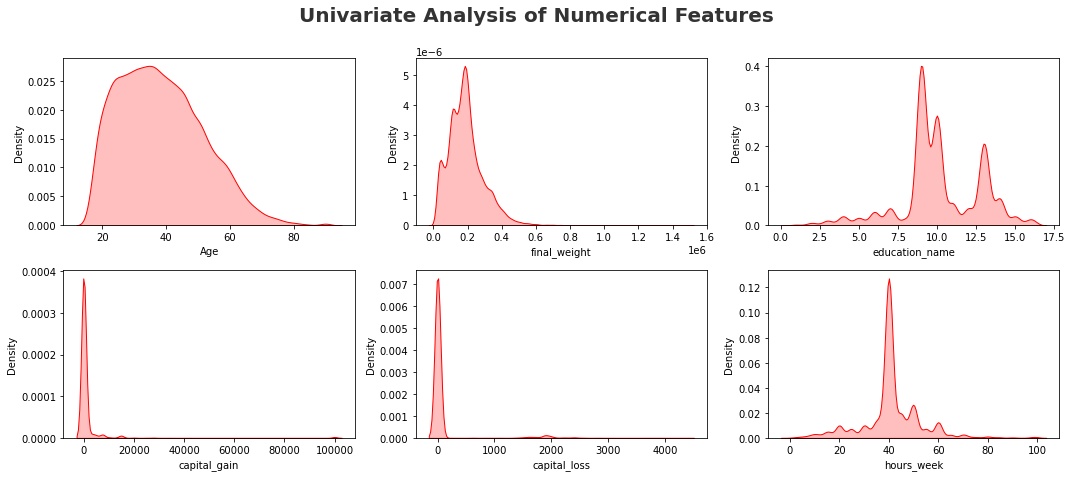

In [58]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# From the Univariate Analysis of Numerical Features, we get:-

# Maximum no of people belong to age between 25 to 50.

# Maximum no of people having final_weight belong between 0.1 to 0.3.

# Maximum no of people having education_name belong between 7.5 to 11.

# Maximum no of people working  hours_week belong between 35 to 45.

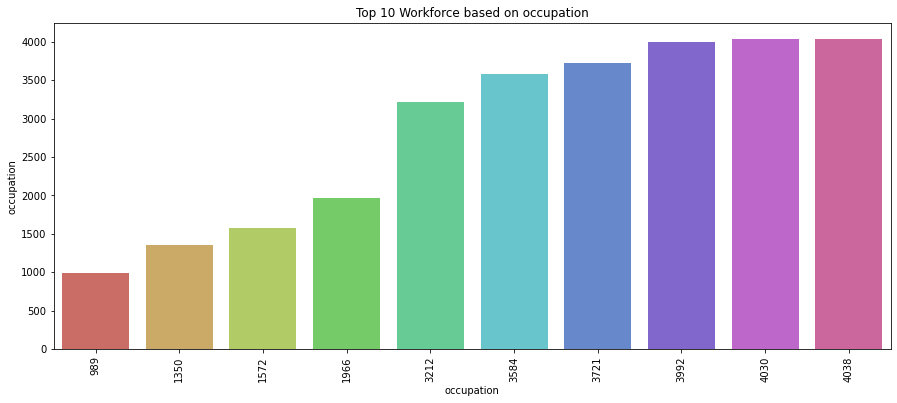

In [61]:
df_cat=df["occupation"].value_counts()[:10]
category = pd.DataFrame(df['occupation'].value_counts()) 
plt.figure(figsize=(15,6))
sns.barplot(x=df_cat, y ='occupation',data = category[:10],palette='hls')
plt.title('Top 10 Workforce based on occupation')
plt.xticks(rotation=90)
plt.show()

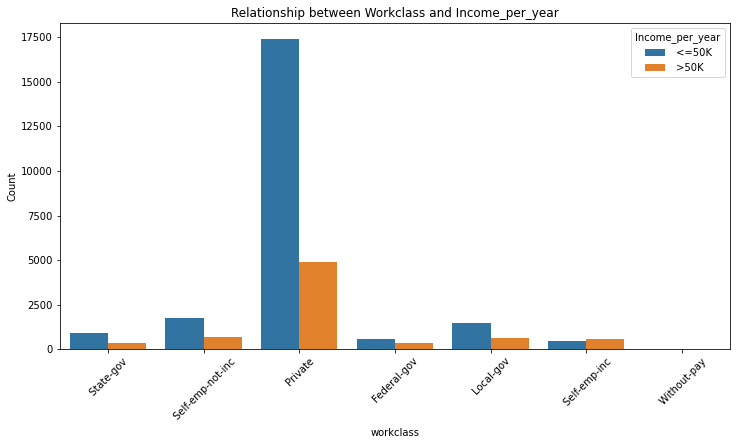

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', hue='Income_per_year', data=df)
plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('Relationship between Workclass and Income_per_year')
plt.xticks(rotation=45)
plt.legend(title='Income_per_year', loc='upper right')
plt.show()

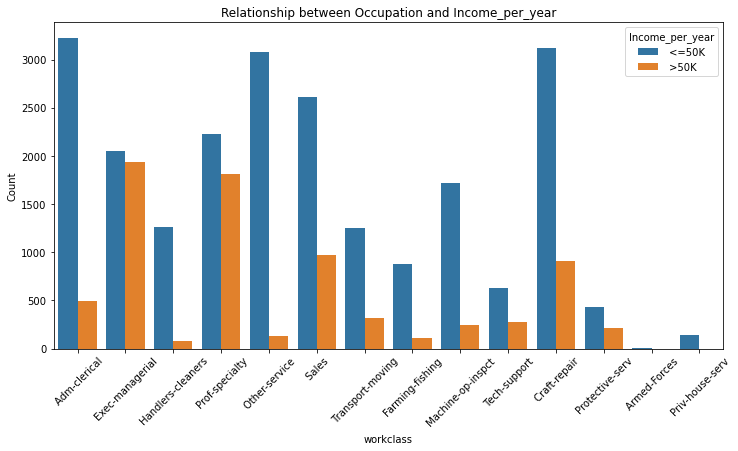

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x='occupation', hue='Income_per_year', data=df)
plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('Relationship between Occupation and Income_per_year')
plt.xticks(rotation=45)
plt.legend(title='Income_per_year', loc='upper right')
plt.show()

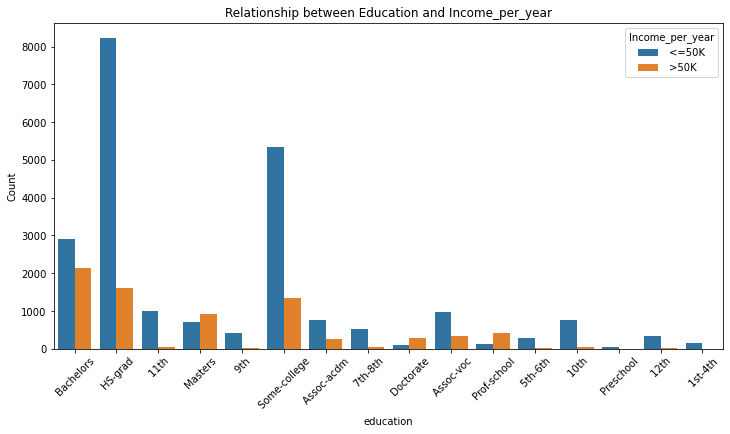

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='education', hue='Income_per_year', data=df)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Relationship between Education and Income_per_year')
plt.xticks(rotation=45)
plt.legend(title='Income_per_year', loc='upper right')
plt.show()

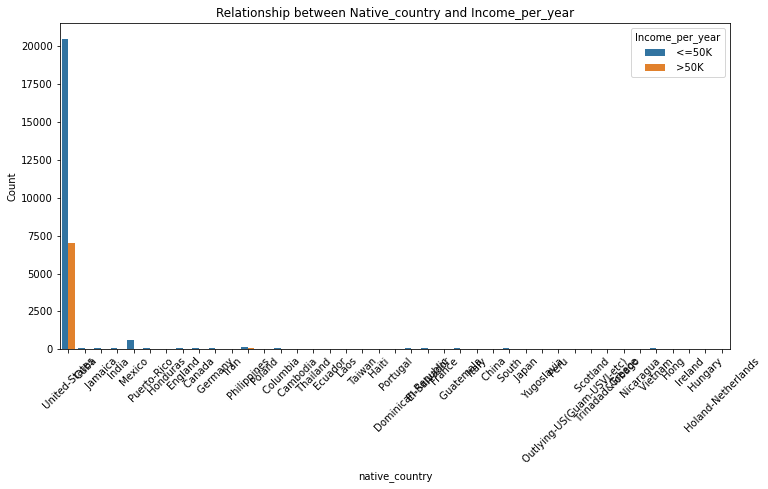

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(x='native_country', hue='Income_per_year', data=df)
plt.xlabel('native_country')
plt.ylabel('Count')
plt.title('Relationship between Native_country and Income_per_year')
plt.xticks(rotation=45)
plt.legend(title='Income_per_year', loc='upper right')
plt.show()

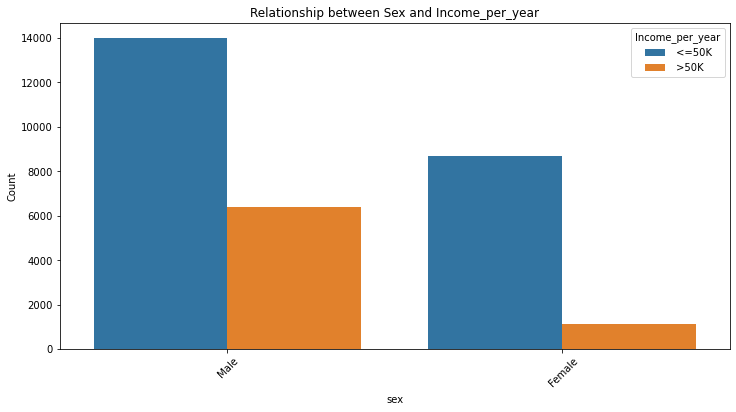

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x='sex', hue='Income_per_year', data=df)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Income_per_year')
plt.xticks(rotation=45)
plt.legend(title='Income_per_year', loc='upper right')
plt.show()

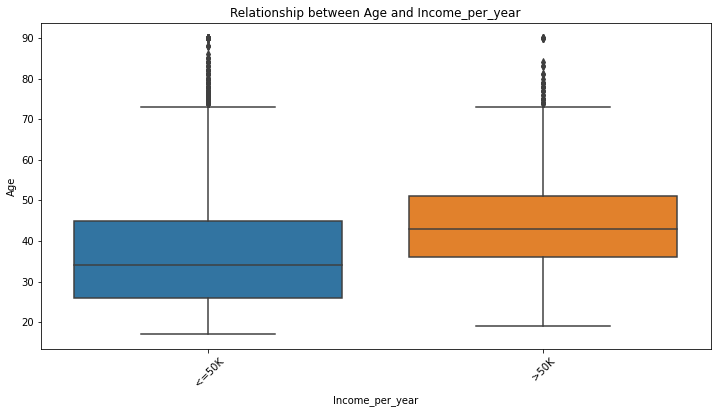

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Income_per_year', y='Age', data=df)
plt.xlabel('Income_per_year')
plt.ylabel('Age')
plt.title('Relationship between Age and Income_per_year')
plt.xticks(rotation=45)
plt.show()

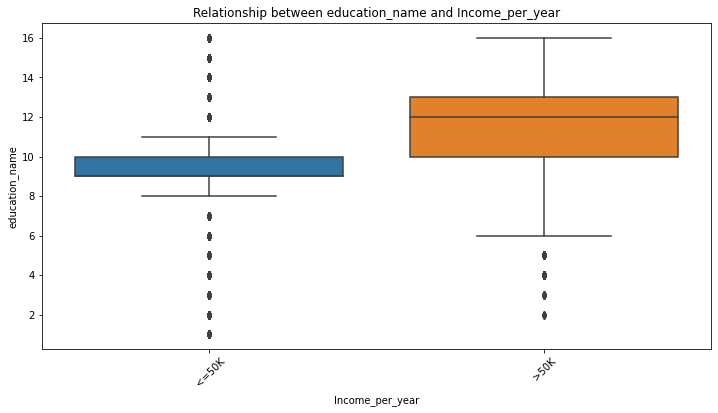

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Income_per_year', y='education_name', data=df)
plt.xlabel('Income_per_year')
plt.ylabel('education_name')
plt.title('Relationship between education_name and Income_per_year')
plt.xticks(rotation=45)
plt.show()

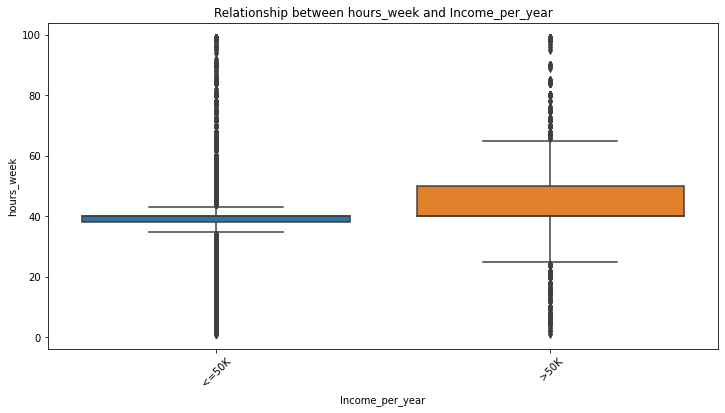

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Income_per_year', y='hours_week', data=df)
plt.xlabel('Income_per_year')
plt.ylabel('hours_week')
plt.title('Relationship between hours_week and Income_per_year')
plt.xticks(rotation=45)
plt.show()